In [14]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model


In [15]:
# A generator is created for image augmentation. This helps in increasing the data and also helps making the model more robust
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 32 #Batch_Size
TS=(24,24) #Target_size
train_batch= generator('train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('test',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS #Steps_per_Epochs
VS = len(valid_batch.classes)//BS #Validation_size
print(SPE,VS)


Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
38 6


In [16]:
model = Sequential([
    
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

retVal = model.fit_generator(train_batch, validation_data=valid_batch,epochs=20,steps_per_epoch=SPE ,validation_steps=VS)

model.save('models/cnnCat2.h5', overwrite=True)

<ipython-input-17-079e42ee3f17>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  retVal = model.fit_generator(train_batch, validation_data=valid_batch,epochs=20,steps_per_epoch=SPE ,validation_steps=VS)


Epoch 1/20
38/38 [==============================] - 14s 315ms/step - loss: 0.4835 - accuracy: 0.7820 - val_loss: 0.2264 - val_accuracy: 0.9219
Epoch 2/20
38/38 [==============================] - 12s 309ms/step - loss: 0.2367 - accuracy: 0.9151 - val_loss: 0.2627 - val_accuracy: 0.8646
Epoch 3/20
38/38 [==============================] - 11s 299ms/step - loss: 0.1901 - accuracy: 0.9334 - val_loss: 0.1100 - val_accuracy: 0.9583
Epoch 4/20
38/38 [==============================] - 12s 310ms/step - loss: 0.1032 - accuracy: 0.9626 - val_loss: 0.1101 - val_accuracy: 0.9531
Epoch 5/20
38/38 [==============================] - 13s 336ms/step - loss: 0.1000 - accuracy: 0.9676 - val_loss: 0.0855 - val_accuracy: 0.9635
Epoch 6/20
38/38 [==============================] - 12s 305ms/step - loss: 0.0760 - accuracy: 0.9717 - val_loss: 0.0830 - val_accuracy: 0.9635
Epoch 7/20
38/38 [==============================] - 12s 319ms/step - loss: 0.0292 - accuracy: 0.9875 - val_loss: 0.1077 - val_accuracy: 0.9740

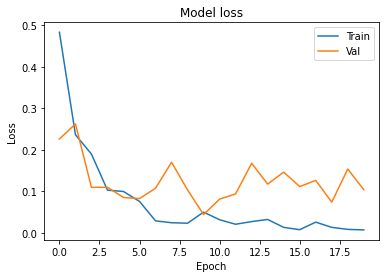

In [18]:
plt.plot(retVal.history['loss'])
plt.plot(retVal.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

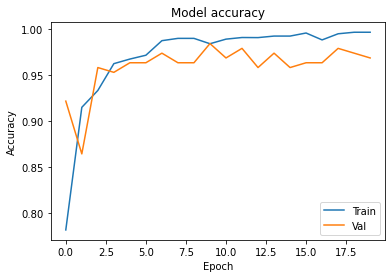

In [19]:
plt.plot(retVal.history['accuracy'])
plt.plot(retVal.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [44]:
my_image = plt.imread("image0.jpg")

In [45]:
from skimage.transform import resize
my_image_resized = resize(my_image, (24,24,1))

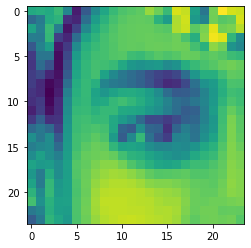

In [46]:
img = plt.imshow(my_image_resized)

In [47]:
import numpy as np
probabilities = model.predict(np.array([my_image_resized,]))

In [48]:
probabilities

array([[0.02683785, 0.9731621 ]], dtype=float32)

In [49]:
number_to_class = ['closed','open']
index = np.argsort(probabilities[0,:])
print("Fourth most likely class:", number_to_class[index[0]], "-- Probability:", probabilities[0,index[0]])
print("Fourth most likely class:", number_to_class[index[1]], "-- Probability:", probabilities[0,index[1]])


Fourth most likely class: closed -- Probability: 0.026837854
Fourth most likely class: open -- Probability: 0.9731621
